# OpenCV haar cascade feature detection

In this notebook we use haar cascade feature detection on faces.

## Imports
Includes our own libraries

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from lib.imageutil import show_image, median_canny

## Face detection using haar cascade

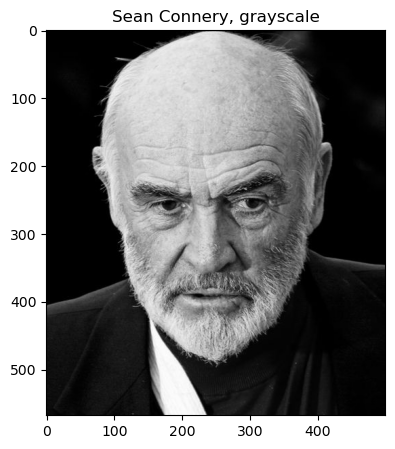

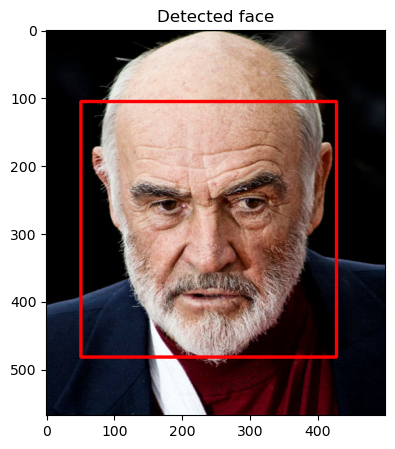

In [3]:
image = cv2.imread('./tmp/wiki/09/26709_1930-08-25_2008.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

show_image(gray, "Sean Connery, grayscale")

face_classifier = cv2.CascadeClassifier('../data/haarcascades/haarcascade_frontalface_default.xml')

faces = face_classifier.detectMultiScale(gray, scaleFactor = 1.3, minNeighbors = 5)
if len(faces) == 0:
    print("Could not find any faces")

for (x, y, width, height) in faces:
    cv2.rectangle(image, (x, y), (x + width,y + height), (0,0,255), 3)

show_image(image, 'Detected face')

## Face and eye detection
We can also detect multiple features by using appropriate haar cascades.

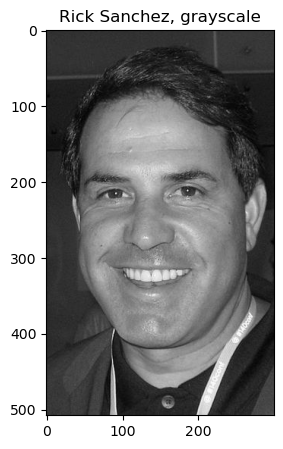

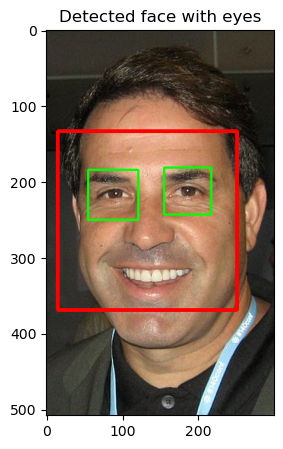

In [4]:
image = cv2.imread('./tmp/wiki/09/4355909_1958-07-03_2009.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

show_image(gray, "Rick Sanchez, grayscale")

face_classifier = cv2.CascadeClassifier('../data/haarcascades/haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('../data/haarcascades/haarcascade_eye.xml')

faces = face_classifier.detectMultiScale(gray, scaleFactor = 1.3, minNeighbors = 5)
if len(faces) == 0:
    print("Could not find any faces")

for (x, y, width, height) in faces:
    cv2.rectangle(image, (x, y), (x + width,y + height), (0,0,255), 3)
    face_region = gray[y:y + height, x:x + width]
    face_region_colored = image[y:y + height, x:x + width]
    eyes = eye_classifier.detectMultiScale(face_region, scaleFactor = 1.3, minNeighbors = 5)
    if len(eyes) == 0:
        print("Could not find any eyes")
    for (e_x,e_y,e_width,e_height) in eyes:
        cv2.rectangle(face_region_colored,(e_x,e_y),(e_x + e_width,e_y + e_height),(0,255,0),2)

show_image(image, 'Detected face with eyes')

## Face detection on video
We can also run the face detection on a video stream. We do this on a video, because
capturing the webcam in jupyter inside a docker container is not always that straightforward...

In [5]:
from IPython import display
from time import time

from lib.imageutil import array_to_image
from lib.videoutil import get_frame

In [7]:
capture = cv2.VideoCapture("../video/face_video.mp4")

d = display.display("", display_id=1)
d2 = display.display("", display_id=2)
while True:
    try:
        t1 = time()
        frame = get_frame(capture)
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        im = array_to_image(frame)

        d.update(im)

        t2 = time()

        s = f"""{int(1/(t2-t1))} FPS"""
        d2.update( display.HTML(s) )
    except KeyboardInterrupt:
        print()
        capture.release()
        display.clear_output()
        print ("Stream stopped")
        break

Stream stopped


Next, we want to run our haar-cascade face detector on each frame:

In [32]:
def face_detector(image, size=1.0, face_frame_color=(255, 255, 0), eyes_frame_color=(0,0,255)):
    if size != 1.0:
        image = cv2.resize(image, None, fx=size, fy=size)
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    if len(faces) == 0:
        return image
    
    for (x, y, width, height) in faces:
        cv2.rectangle(image, (x, y), (x + width, y + height), face_frame_color, 2)
        face_region = gray[y:y + height, x:x + width]
        face_region_colored = image[y:y + height, x:x + width]
        eyes = eye_classifier.detectMultiScale(face_region, 1.3, 5)
        
        for (e_x, e_y, e_width, e_height) in eyes:
            cv2.rectangle(face_region_colored, (e_x, e_y), (e_x + e_width, e_y + e_height),eyes_frame_color ,2) 
    return image

In [33]:
capture = cv2.VideoCapture("../video/face_video.mp4")

d = display.display("", display_id=1)
d2 = display.display("", display_id=2)

while True:
    try:
        t1 = time()
        frame = get_frame(capture)
        frame = face_detector(frame, size=0.5)
        
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        im = array_to_image(frame)

        d.update(im)

        t2 = time()

        s = f"""{int(1/(t2-t1))} FPS"""
        d2.update( display.HTML(s) )
    except KeyboardInterrupt:
        print()
        capture.release()
        display.clear_output()
        print ("Stream stopped")
        break

Stream stopped


## Other haar cascade detectors
There are also a number of other detectors using haar cascade, for example a configuration to detect cats.

In [69]:
cat_face_classifier = cv2.CascadeClassifier('../data/haarcascades/haarcascade_frontalcatface.xml')
def cat_face_detector(image, size=1.0, face_frame_color=(255, 255, 0), eyes_frame_color=(0,0,255)):
    if size != 1.0:
        image = cv2.resize(image, None, fx=size, fy=size)
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    faces = cat_face_classifier.detectMultiScale(gray, 1.05, 3)
    if len(faces) == 0:
        return image
    
    for (x, y, width, height) in faces:
        cv2.rectangle(image, (x, y), (x + width, y + height), face_frame_color, 2)
        face_region = gray[y:y + height, x:x + width]
        face_region_colored = image[y:y + height, x:x + width]
        eyes = eye_classifier.detectMultiScale(face_region, 1.8, 2)
        
        for (e_x, e_y, e_width, e_height) in eyes:
            cv2.rectangle(face_region_colored, (e_x, e_y), (e_x + e_width, e_y + e_height),eyes_frame_color ,2) 
    return image

In [68]:
capture = cv2.VideoCapture("../video/cat.mp4")

d = display.display("", display_id=1)
d2 = display.display("", display_id=2)

while True:
    try:
        t1 = time()
        frame = get_frame(capture)
        frame = cat_face_detector(frame, size=0.25)
        
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        im = array_to_image(frame)

        d.update(im)

        t2 = time()

        s = f"""{int(1/(t2-t1))} FPS"""
        d2.update( display.HTML(s) )
    except KeyboardInterrupt:
        print()
        capture.release()
        display.clear_output()
        print ("Stream stopped")
        break

Stream stopped


Lets try a different video:

In [70]:
capture = cv2.VideoCapture("../video/cat_piano.mp4")

d = display.display("", display_id=1)
d2 = display.display("", display_id=2)

while True:
    try:
        t1 = time()
        frame = get_frame(capture)
        frame = cat_face_detector(frame, size=0.25)
        
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        im = array_to_image(frame)

        d.update(im)

        t2 = time()

        s = f"""{int(1/(t2-t1))} FPS"""
        d2.update( display.HTML(s) )
    except KeyboardInterrupt:
        print()
        capture.release()
        display.clear_output()
        print ("Stream stopped")
        break

Stream stopped
